In [2]:
%matplotlib inline 
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style(theme='onedork')

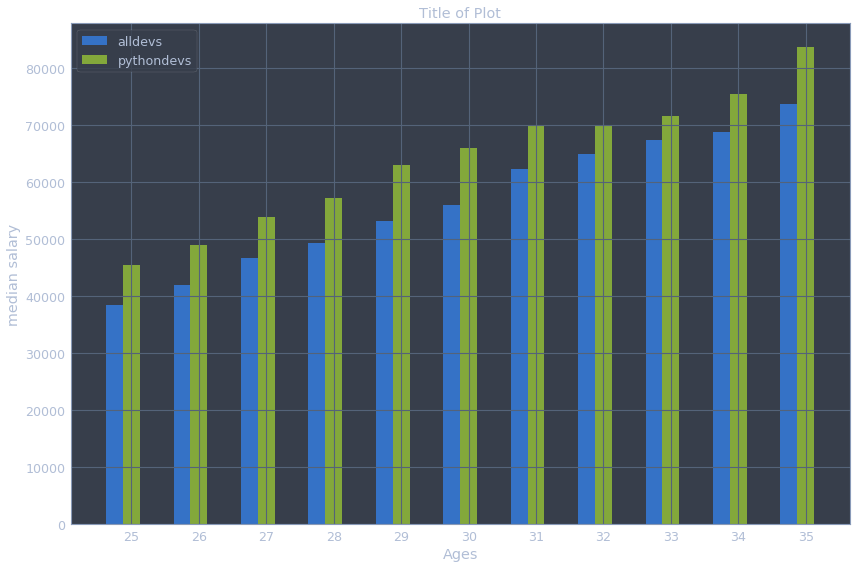

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [12, 8]
#plt.style.use('fivethirtyeight')
#print(plt.style.available)
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
x_indexes = np.arange(len(ages_x))
width = 0.25
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
# Median Python Developer Salaries by Age

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]


# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(x_indexes-width,dev_y,width=width,label='alldevs')
plt.bar(x_indexes,py_dev_y,width=width,label='pythondevs')
#plt.bar(x_indexes+width,js_dev_y,width=width,label='JS devs')
#plt.barh(languages,popularity)
#lt.plot(ages_x,dev_y,color='k',linestyle='--',label='alldevs')
#lt.plot(ages_x,py_dev_y,color='b',linewidth=2,label='pythondevs')
#lt.plot(ages_x,js_dev_y,color='#adad3b',linewidth=2,label='JS devs')

plt.xlabel("Ages")
plt.xlabel("Ages")
plt.ylabel("median salary")
plt.title("Title of Plot")
plt.xticks(ticks=x_indexes,labels=ages_x)
plt.legend()
#lt.grid(True)
plt.tight_layout()
plt.savefig('plot.png')
plt.show()



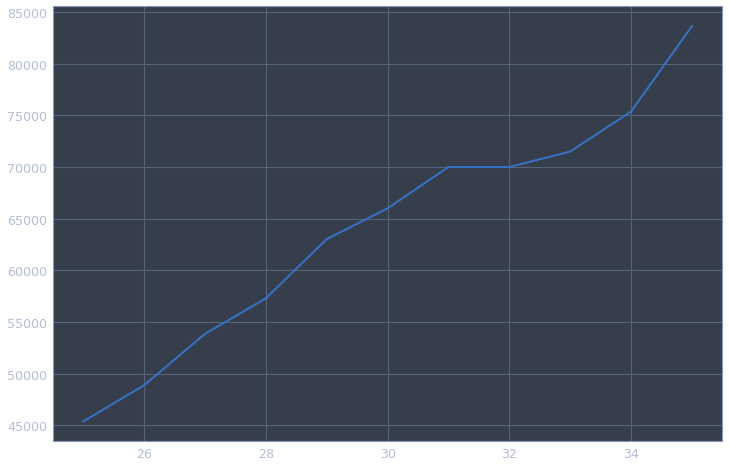

In [4]:
plt.plot(ages_x,py_dev_y,linewidth=2,label='pythondevs')
plt.show()

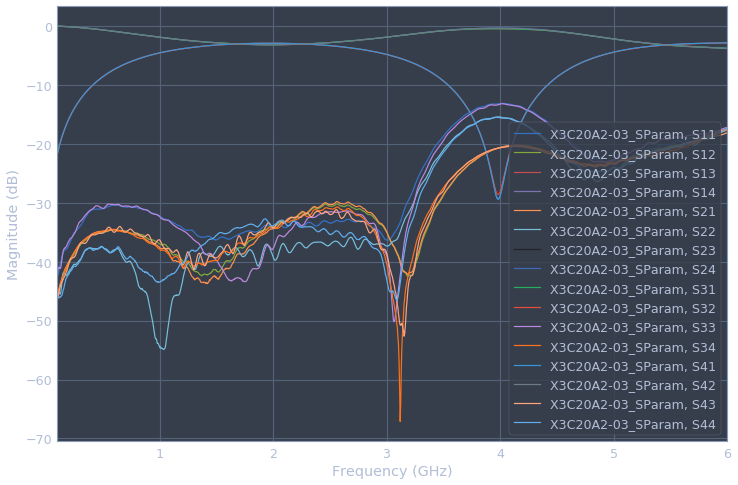

In [27]:
import skrf as rf
from skrf.data import ring_slot
from skrf import media

r1 = ring_slot.copy()
r2 = ring_slot.copy()

xinger = rf.Network('/home/bah235/Documents/ATE/ATE/X3C20A2-03_SParam.s4p')
TGA2976 = rf.Network('TGA2976-SM_40V_360mA.s2p')

#ring_slot.plot_s_db()
xinger.plot_s_db()

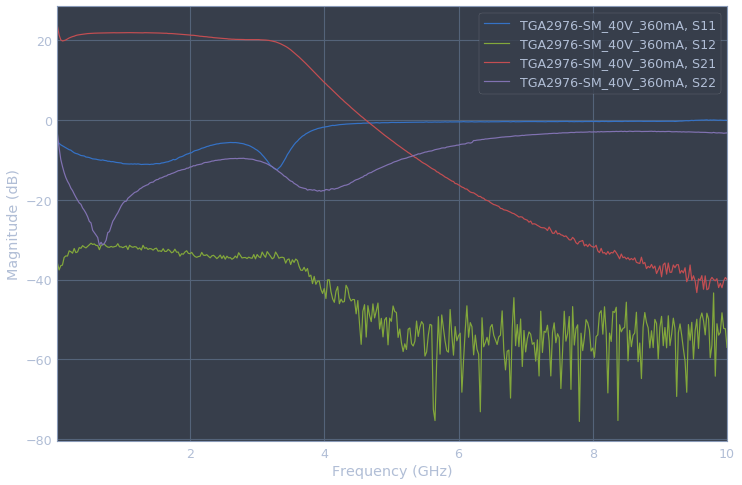

In [6]:
TGA2976.plot_s_db()


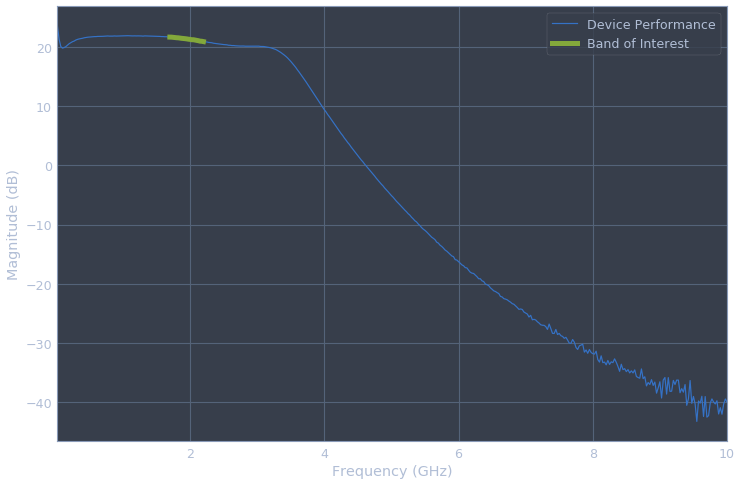

In [28]:
TGA2976.s21.plot_s_db(label='Device Performance')
TGA2976.s21['1.7-2.2ghz'].plot_s_db(lw=5, label='Band of Interest')


First, we read in an s1p file to create a load impedance for terminating the couplers. We also plot the response as a sanity check.

1-Port Network: 'load',  0.0-10.0 GHz, 5 pts, z0=[50.+0.j]


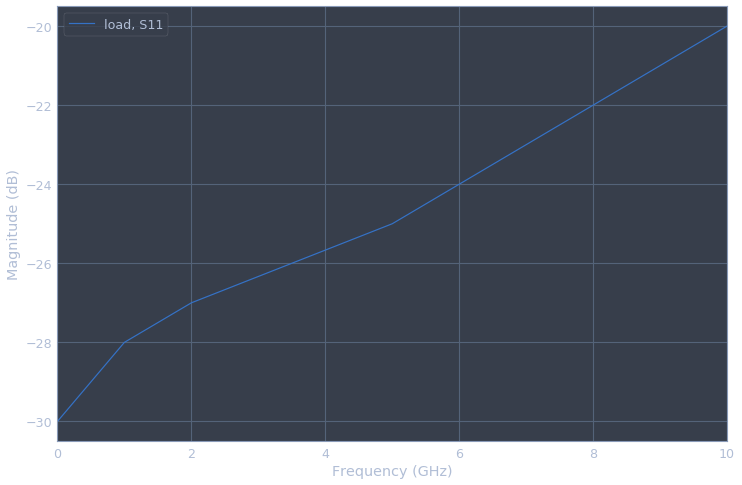

In [8]:
Load = rf.Network('load.s1p')
Load.s11.plot_s_db()
print(Load)

Next, we deal with the Xinger couplers. We make splitter and combiner objects but connecting the terminations apropriately.

Start by creating a frequency object to resample the S parameter files so they all have the same series of frequency points.

Then connect terminations to the couplers on port 2 to form a splitter and port 4 to form a combiner.


In [9]:
#Create Frequency Definition
freq = rf.Frequency(1,3,201,'ghz')

Load = Load.interpolate_from_f(freq)
print("The termination: ", Load)

coupler = xinger['1-3ghz']
coupler.resample(201)
print("The 4 port Xinger Coupler: ", coupler)

Splitter = coupler
Combiner = coupler

Splitter = rf.connect(Splitter, 1, Load, 0)
Combiner = rf.connect(Combiner, 3, Load, 0)

print("The 3 port Splitter: ", Splitter)
print("The 3 port Combiner: ", Combiner)


The termination:  1-Port Network: 'load',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j]
The 4 port Xinger Coupler:  4-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j 50.+0.j 50.+0.j]
The 3 port Splitter:  3-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j 50.+0.j]
The 3 port Combiner:  3-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j 50.+0.j]


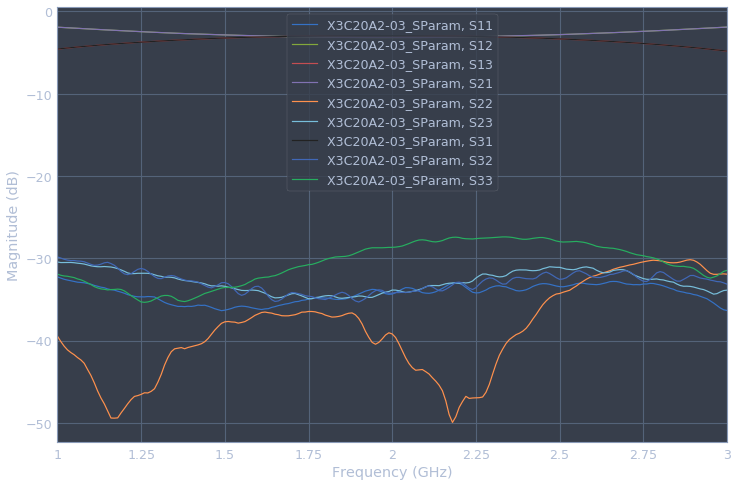

In [10]:
Splitter.plot_s_db()

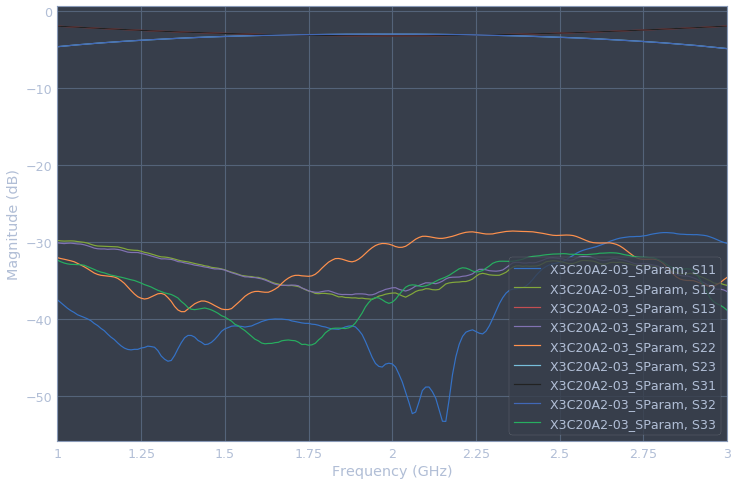

In [11]:
Combiner.plot_s_db()

Create amplifier objects and resample the S parameter data to matching frequency indicies.

I Branch Amp 2-Port Network: 'TGA2976-SM_40V_360mA',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]
Q Branch Amp 2-Port Network: 'TGA2976-SM_40V_360mA',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]
The new cascade:  3-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j 50.+0.j]


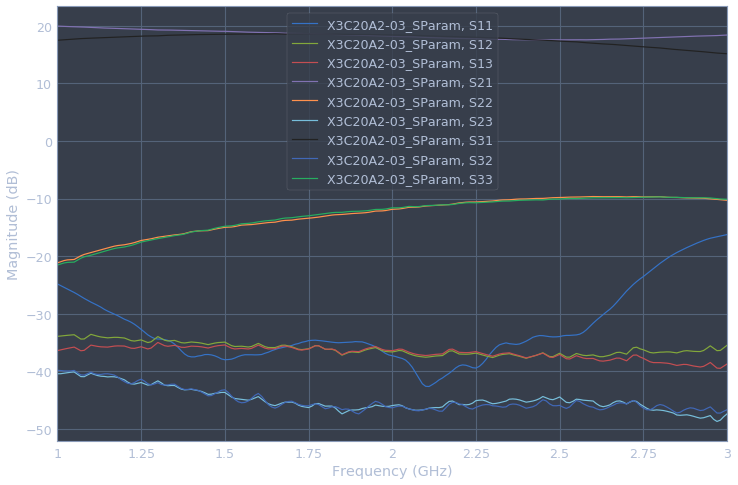

In [12]:
amp = TGA2976['1-3ghz']
amp.resample(201)
amp1 = amp
amp2 = amp
print("I Branch Amp", amp1)
print("Q Branch Amp", amp2)

# Connect the amps tp the splitter with the connect command
# Remember that port indicies are numbered from 0 and not one for these operations
cascade = rf.connect(Splitter, 1, amp1, 0)
cascade = rf.connect(cascade, 2, amp2, 0)

print("The new cascade: ", cascade)

cascade.plot_s_db()
axis = plt.gca()
#axis.set(ylim=(15, 20))

Comment: 

Remember to label the cells when plotting specific S parameters. The automatic labelling only works when you plot all the s terms. This is a bit of a bug.


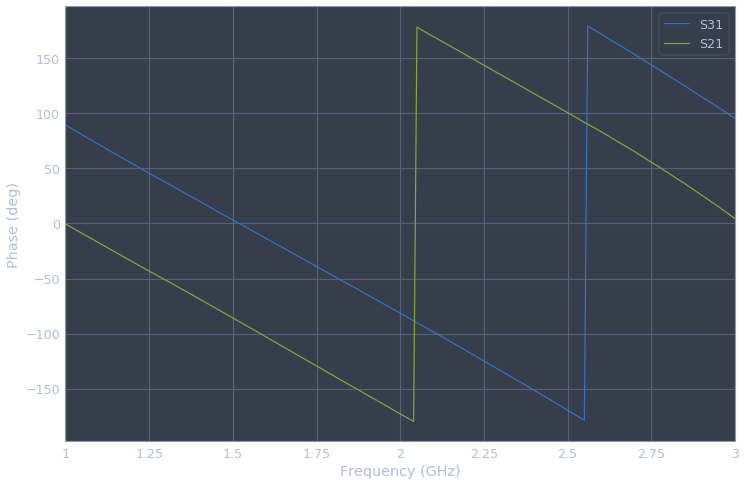

In [13]:
cascade.s31.plot_s_deg(label='S31')
cascade.s21.plot_s_deg(label='S21')

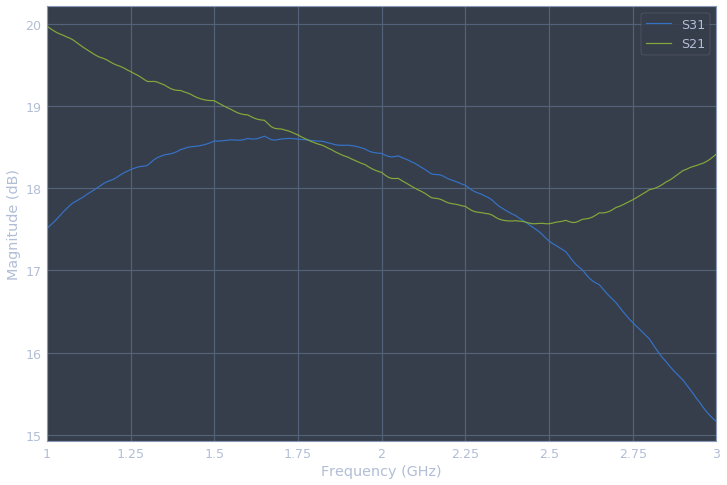

In [14]:
cascade.s31.plot_s_db(label='S31')
cascade.s21.plot_s_db(label='S21')

3-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j 50.+0.j]
3-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j 50.+0.j]
2-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]


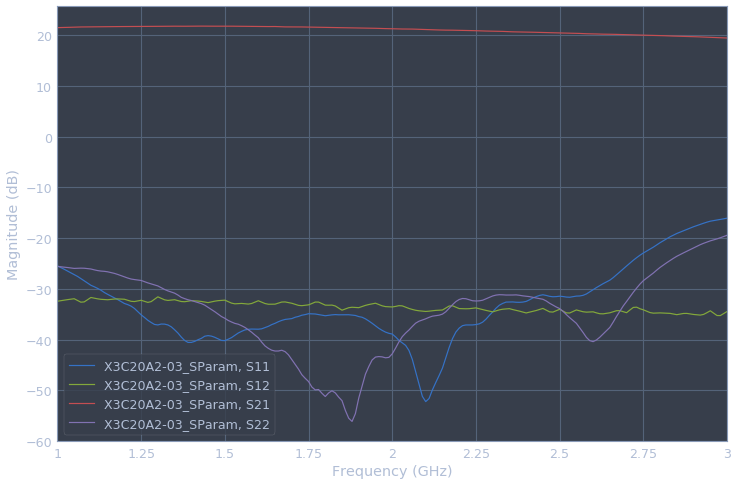

In [15]:
print(cascade)
print(Combiner)

Combiner.renumber([0,1,2],[1,0,2])

# Connect first branch to combiner.
final = rf.connect(cascade, 1, Combiner, 0,2)
print(final)
final.plot_s_db()
# Now we have a problem, because it's just one network. Not we need to use the self connect
# cascade.s31.plot_s_db(label='S31')
# cascade.s21.plot_s_db(label='S21')
# cascade.s41.plot_s_db(label='S41')

Now, we take two of these networks and combine them again.

In [16]:
top = final
bottom = final

print(top)
print(bottom)

2-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]
2-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]


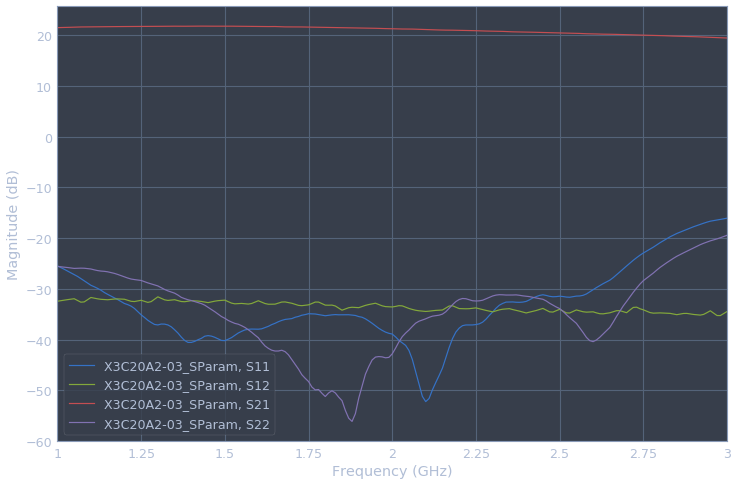

In [17]:
top.plot_s_db()

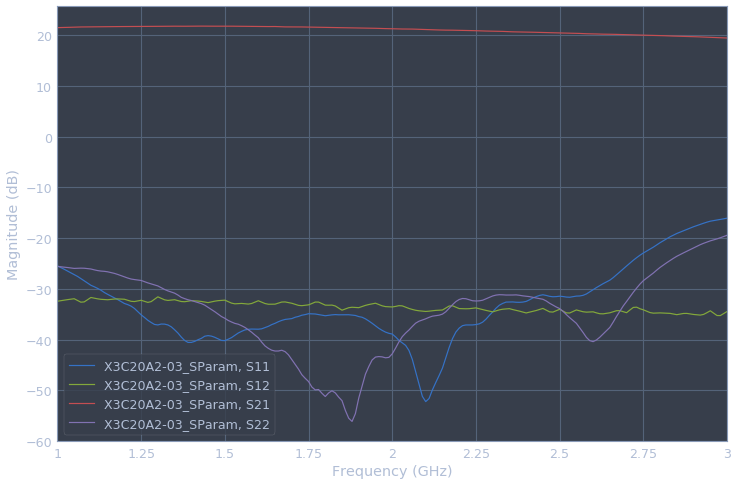

In [18]:
bottom.plot_s_db()

2-Port Network: 'X3C20A2-03_SParam',  1.0-3.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]


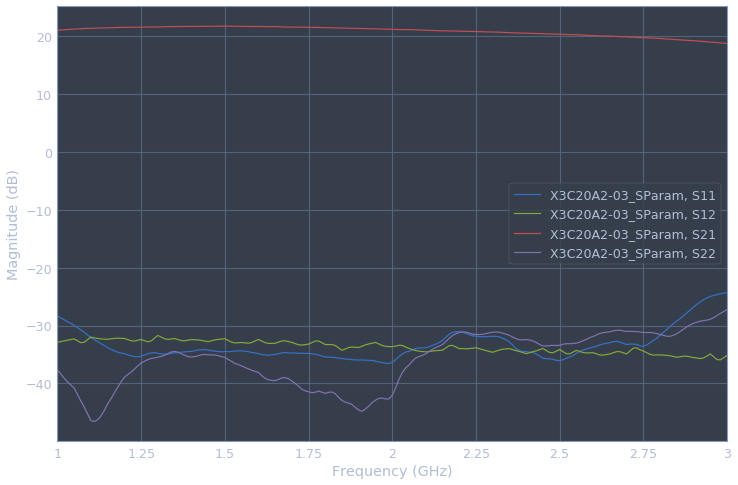

In [19]:
postamp = rf.connect(Splitter, 1, top, 0)
postamp = rf.connect(postamp, 2, bottom, 0)
postamp = rf.connect(postamp, 1, Combiner, 0,2)
print(postamp)
postamp.plot_s_db()

In [20]:
x=4
y=4
print(x*y)


16


In [21]:
print(5*y)

20
